In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Text
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Capture similarity 
from sentence_transformers import SentenceTransformer



In [71]:
%%time
stocks = pd.read_csv('sp500.csv')

CPU times: total: 15.6 ms
Wall time: 11 ms


In [72]:
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idnumber             493 non-null    int64  
 1   exchange             493 non-null    object 
 2   symbol               493 non-null    object 
 3   shortname            493 non-null    object 
 4   longname             493 non-null    object 
 5   longnamesort         493 non-null    object 
 6   sector               493 non-null    object 
 7   industry             493 non-null    object 
 8   prices               493 non-null    float64
 9   marketcap            493 non-null    float64
 10  ebitda               463 non-null    float64
 11  revenuegrowth        492 non-null    float64
 12  city                 493 non-null    object 
 13  state                474 non-null    object 
 14  country              493 non-null    object 
 15  fulltimeemployees    486 non-null    flo

In [73]:
stocks.drop(['longnamesort','prices','esgrating','logo'], inplace=True, axis=1)

In [74]:
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idnumber             493 non-null    int64  
 1   exchange             493 non-null    object 
 2   symbol               493 non-null    object 
 3   shortname            493 non-null    object 
 4   longname             493 non-null    object 
 5   sector               493 non-null    object 
 6   industry             493 non-null    object 
 7   marketcap            493 non-null    float64
 8   ebitda               463 non-null    float64
 9   revenuegrowth        492 non-null    float64
 10  city                 493 non-null    object 
 11  state                474 non-null    object 
 12  country              493 non-null    object 
 13  fulltimeemployees    486 non-null    float64
 14  longbusinesssummary  493 non-null    object 
 15  weight               493 non-null    flo

Sector Distribution

<AxesSubplot:>

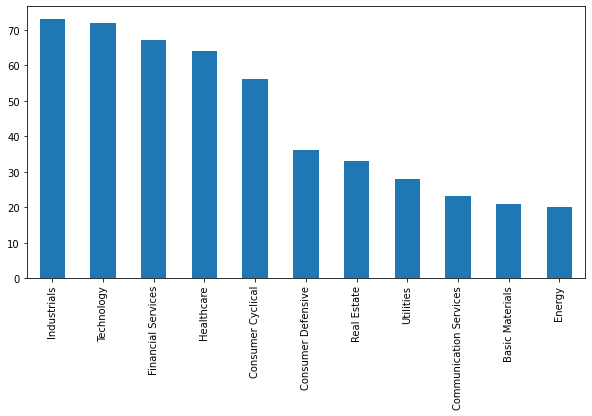

In [75]:
stocks['sector'].value_counts().plot(x = 'sector', y ='count', kind = 'bar', figsize = (10,5))

Industry Distribution

<AxesSubplot:>

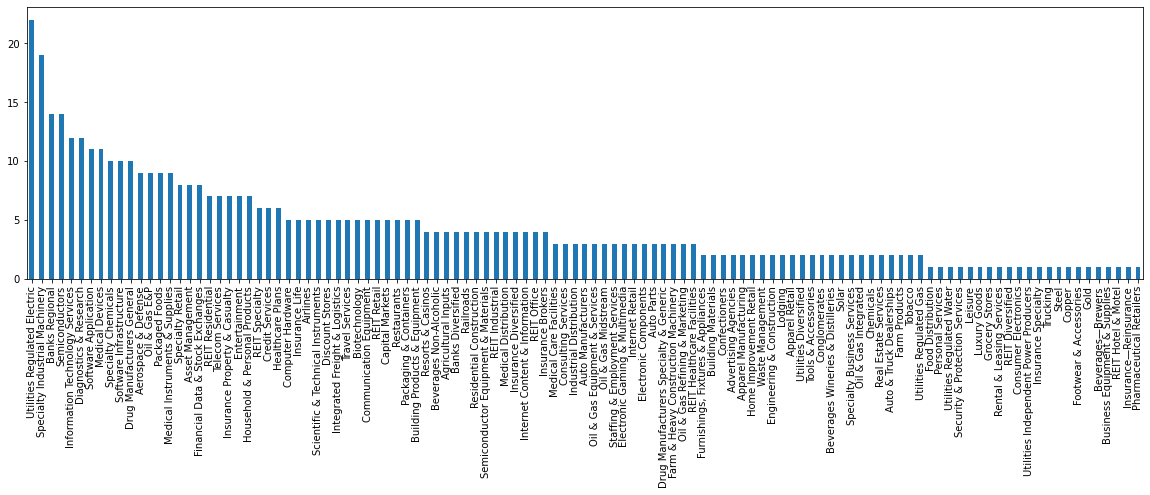

In [76]:
stocks['industry'].value_counts().plot(x = 'industry', y ='count', kind = 'bar', figsize = (20,5))

Exchange Distribution

<AxesSubplot:>

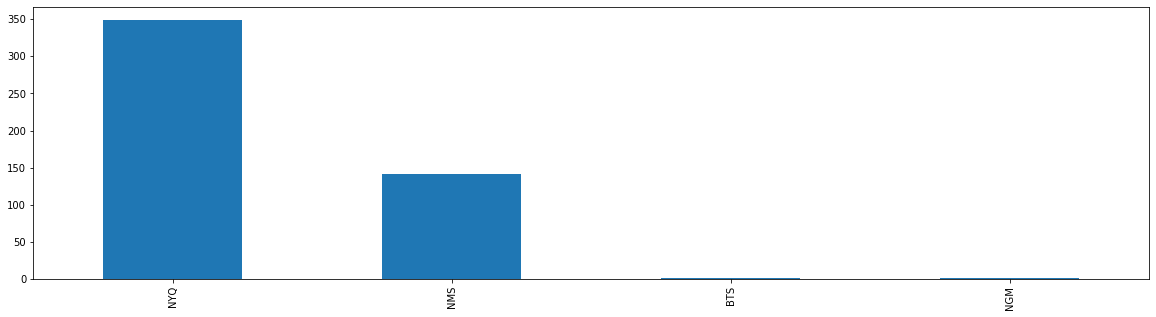

In [77]:
stocks['exchange'].value_counts().plot(x = 'exchange', y ='count', kind = 'bar', figsize = (20,5))

In [80]:
X = np.array(stocks.longbusinesssummary)

In [83]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [84]:
embed_data = embeddings

In [85]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-1.094553,-3.025238,1.445602,-0.678940,-0.555576
1,-1.318477,-1.289030,-2.584332,-1.628514,3.127272
2,-2.478821,-1.561208,-4.145473,-0.558022,2.921602
3,-2.174773,-1.666609,-3.896360,0.295175,3.529484
4,-4.333916,0.252653,2.797520,1.588124,1.798208


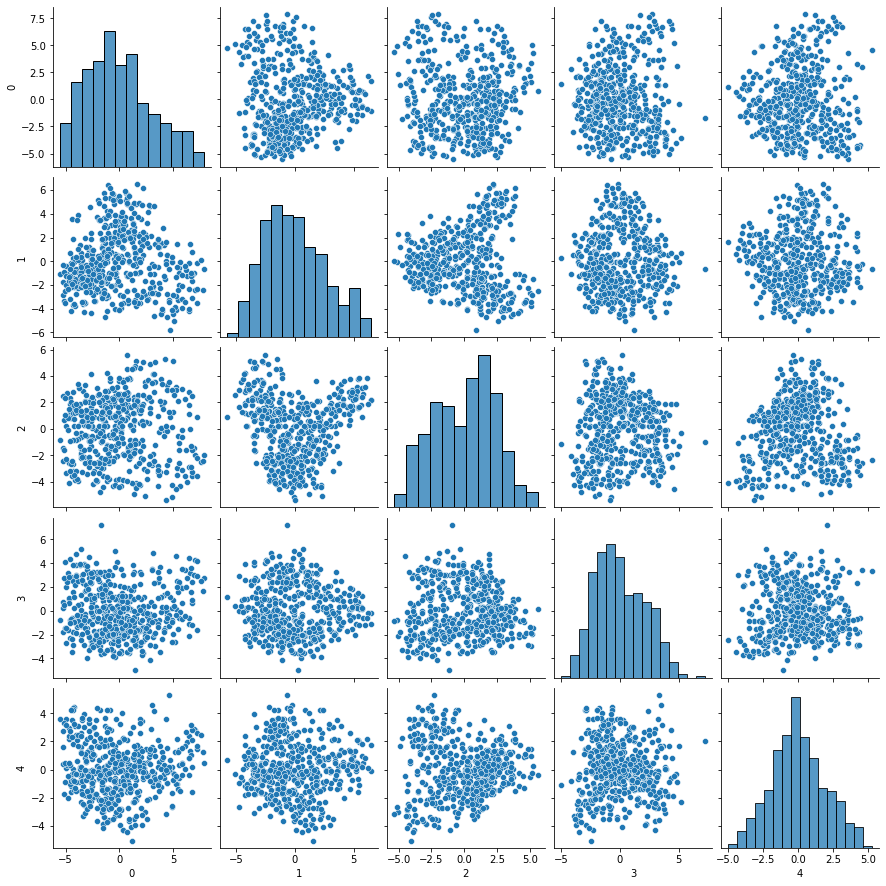

In [86]:
sns.pairplot(pca_data)

Recommender function taken in modified form from:https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4

In [87]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))


def give_recommendations(index, print_recommendation=False, print_recommendation_plots=False, print_genres=False):
    index_recomm = cos_sim_data.loc[index].sort_values(
        ascending=False).index.tolist()[1:6]
    stocks_recomm = stocks['symbol'].loc[index_recomm].values
    result = {'Stocks': stocks_recomm, 'Index': index_recomm}
    if print_recommendation == True:
        print('The watched stock is this one: %s \n' %(stocks['symbol'].loc[index]))
        k = 1
        for stock in stocks_recomm:
            print('The number %i recommended stock is this one: %s \n' %(k, stock))
    if print_recommendation_plots == True:
        print('The plot of the watched stock is this one:\n %s \n' %(stocks['longbusinesssummary'].loc[index]))
        k = 1
        for q in range(len(stocks_recomm)):
            plot_q = stocks['longbusinesssummary'].loc[index_recomm[q]]
            print('The plot of the number %i recommended stock is this one:\n %s \n' % (
                k, plot_q))
            k = k+1
    if print_genres == True:
        print('The genres of the watched stock is this one:\n %s \n' %
              (stocks['sector'].loc[index]))
        k = 1
        for q in range(len(stocks_recomm)):
            plot_q = stocks['sector'].loc[index_recomm[q]]
            print('The plot of the number %i recommended stock is this one:\n %s \n' % (
                k, plot_q))
            k = k+1
    return result

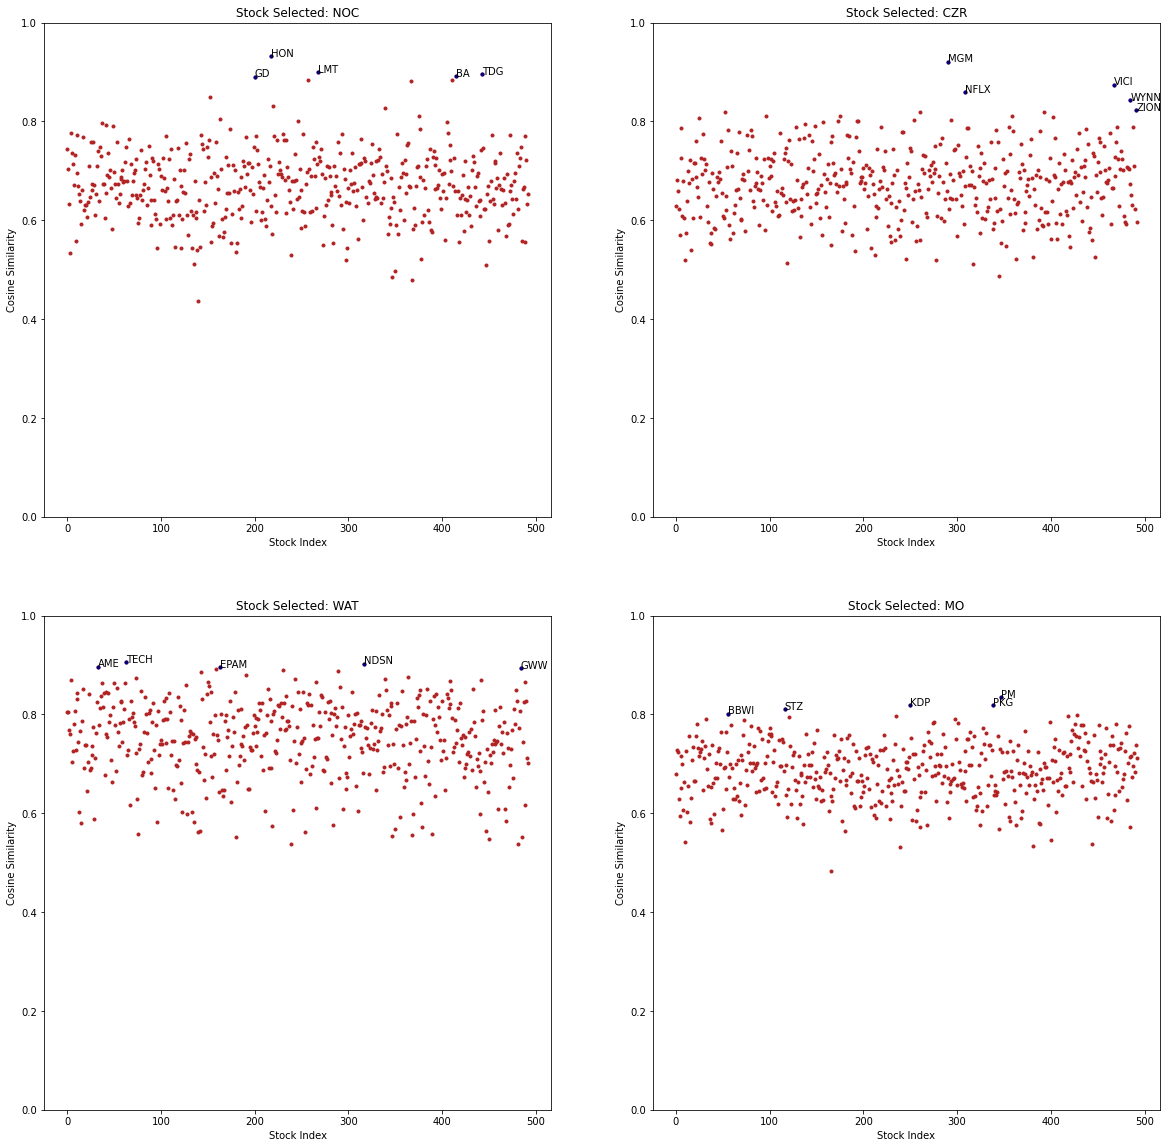

In [98]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Stocks']
  plt.plot(x,y,'.',color='navy',label='Recommended Stocks')
  plt.title('Stock Selected: '+stocks['symbol'].loc[index])
  plt.xlabel('Stock Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)